In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,Embedding,Dropout,RepeatVector,TimeDistributed,Activation


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import svm

import json
from sklearn.metrics.pairwise import cosine_similarity
import datetime

import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#import gensim.downloader
#glove_vectors = gensim.downloader.load('glove-twitter-25')


In [ ]:
pip install sentence-transformers

     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 3.1 MB 32.5 MB/s 
     |████████████████████████████████| 3.3 MB 71.6 MB/s 
     |████████████████████████████████| 1.2 MB 83.9 MB/s 
     |████████████████████████████████| 61 kB 629 kB/s 
     |████████████████████████████████| 596 kB 89.6 MB/s 
     |████████████████████████████████| 895 kB 42.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=d95015f0f12a371e29b141ed8b8d49e70c8e9249d1f03dcfed25b9db60e14379
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("bert-base-nli-mean-tokens")

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
products = ['WHITE METAL LANTERN']
sentence_embeddings = model.encode(products)
print("Shape is",sentence_embeddings.shape )

Shape is (1, 768)


In [ ]:
from scipy import spatial

products = ['blue shirt holder',
            'white coat hanger',
            'holder for wall clock']

sentence_embeddings = model.encode(products)
result = 1 - spatial.distance.cosine(sentence_embeddings[0], sentence_embeddings[1])
print("Similarity between Vector Representations using Bert of product 1 and product 2 is",result)
result = 1 - spatial.distance.cosine(sentence_embeddings[0], sentence_embeddings[2])
print("Similarity between Vector Representations using Bert of product 1 and product 3 is",result)

Similarity between Vector Representations using Bert of product 1 and product 2 is 0.4904721677303314
Similarity between Vector Representations using Bert of product 1 and product 3 is 0.31438684463500977


In [ ]:
from scipy import spatial

products2 = ['blue shirt holder',
            'white coat hanger']
sentence_embeddings = model.encode(products2)
result = 1 - spatial.distance.cosine(sentence_embeddings[0], sentence_embeddings[1])
print("Similarity between Vector Representations using Bert of product 1 and product 2 is ",result)

Similarity between Vector Representations using Bert of product 1 and product 2 is  0.4904722273349762


Similarity between Vector Representations using Bert of product 1 and product 2 is 0.4904721677303314
Similarity between Vector Representations using Bert of product 1 and product 3 is 0.31438684463500977


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(products)
X=X.toarray()
result = 1 - spatial.distance.cosine(X[0], X[1])
print("Similarity between Vector Representations using CountVectorizer product 1 and product 2 is ",result)
result = 1 - spatial.distance.cosine(X[0], X[2])
print("Similarity between Vector Representations using CountVectorizer product 1 and product 2 is ",result)

In [ ]:
products1 = ['Baking powder packet','Baking Tray Set', 
    'Green Umbrella']
sentence_embeddings = model.encode(products1)
sentence_embeddings





array([[-0.22797613,  1.2261379 ,  0.40416822, ...,  0.20564595,
         0.2241724 ,  0.63812596],
       [-0.18963483,  0.69810116,  1.2756332 , ...,  0.5181148 ,
        -0.35528618,  0.04394979],
       [ 0.13920759, -0.39140865, -0.5286991 , ...,  1.3308859 ,
         0.23041698, -0.44773322]], dtype=float32)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

products1 = ['White Coat Hanger','Blue Shirt Holder']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(products1)
X=X.toarray()
result = 1 - spatial.distance.cosine(X[0], X[1])
print("Similarity between product 1 and product 2 is ",result)

Similarity between product 1 and product 2 is  0.0


In [ ]:

result = 1 - spatial.distance.cosine(X[0], X[2])
print("Similarity between product 1 and product 3 is ",result)

Similarity between product 1 and product 2 is  0.33333333333333326
Similarity between product 1 and product 3 is  0.0


In [ ]:
df_root = pd.read_excel('/content/gdrive/MyDrive/Online Retail.xlsx')
df_root.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df = df_root.copy()

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps Jalaligesherhs34ffjgfhg the lazy dog.']
sentence_embeddings = model.encode(sentences)
sentence_embeddings


array([[-0.10409451,  0.52747667,  1.1797732 , ..., -0.4338913 ,
        -0.69452345,  0.5386925 ],
       [-0.13118427, -0.17390287,  1.1052188 , ...,  0.02624421,
        -0.00269832,  0.91611075],
       [-0.5029501 ,  1.0925223 , -0.739755  , ...,  0.11197324,
         1.1183289 ,  0.03116472]], dtype=float32)

In [ ]:
print(df.shape)
df=df[df['Description'].notna()]
print(df.shape)
df=df.reset_index()  

(541909, 8)
(540455, 8)


In [ ]:
list1=[]
for i in df['Description']:
  list1.append(type(i))

print(len(list1))

df_new=df.copy()
df_new['type_des']=list1
print(df_new.shape)
df_new.head(2)



540455
(540455, 10)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,type_des
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,<class 'str'>
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,<class 'str'>


In [ ]:
list1=np.array(list1)
np.where(list1 !=str)

(array([419033]),)

In [ ]:
df_new=df_new[df_new['type_des']==str]


In [ ]:
embed_list =[]

df_parition = df_parition_1.iloc[0:len(df_parition_1),:].copy()
x = df_parition["Description"].values
c=0

for i in x:
  k=model.encode(i)
  c=c+1
  embed_list.append(k)
  if(c%200 ==0):
    print(c)

print("Completed")

NameError: ignored

In [ ]:
import pickle
with open("main_list.txt", "wb") as fp:
    pickle.dump(embed_list, fp)

In [ ]:
df_new

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,type_des
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,<class 'str'>
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,<class 'str'>
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,<class 'str'>
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,<class 'str'>
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...
540450,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,<class 'str'>
540451,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,<class 'str'>
540452,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,<class 'str'>
540453,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,<class 'str'>


In [ ]:
df_train = df_new[["StockCode","InvoiceDate","Description","Country",'UnitPrice',"Quantity"]].reset_index()
df_train

,index,StockCode,InvoiceDate,Description,Country,UnitPrice,Quantity
0,0,85123A,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6
1,1,71053,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom,3.39,6
2,2,84406B,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8
3,3,84029G,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6
4,4,84029E,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6
...,...,...,...,...,...,...,...
540449,540450,22613,2011-12-09 12:50:00,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12
540450,540451,22899,2011-12-09 12:50:00,CHILDREN'S APRON DOLLY GIRL,France,2.10,6
540451,540452,23254,2011-12-09 12:50:00,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4
540452,540453,23255,2011-12-09 12:50:00,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4


In [ ]:
#change -ve quantity to positive, misstype
#if (df[Quantity]<0):
  #df[Quantity] = df[Quantity]*(-1)
c=0
for i in range(len(df_train)):

  if (df_train['Quantity'][i]<0):
    c=c+1
    df_train['Quantity'][i] = df_train['Quantity'][i]*(0)
print(c)



  





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


9761


In [ ]:
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])


In [ ]:
list1=[]
for i in range(len(df_train['InvoiceDate'])):
  list1.append(df_train['InvoiceDate'][i].day)
print(len(list1))

540454


In [ ]:
df_train['Date']=list1
df_train


,index,StockCode,InvoiceDate,Description,Country,UnitPrice,Quantity,Date
0,0,85123A,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6,1
1,1,71053,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom,3.39,6,1
2,2,84406B,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8,1
3,3,84029G,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6,1
4,4,84029E,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6,1
...,...,...,...,...,...,...,...,...
540449,540450,22613,2011-12-09 12:50:00,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12,9
540450,540451,22899,2011-12-09 12:50:00,CHILDREN'S APRON DOLLY GIRL,France,2.10,6,9
540451,540452,23254,2011-12-09 12:50:00,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4,9
540452,540453,23255,2011-12-09 12:50:00,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4,9


In [ ]:
df_train=df_train[['Date','StockCode','Description','Country','UnitPrice','Quantity']]
df_train

,Date,StockCode,Description,Country,UnitPrice,Quantity
0,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6
1,1,71053,WHITE METAL LANTERN,United Kingdom,3.39,6
2,1,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8
3,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6
4,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6
...,...,...,...,...,...,...
540449,9,22613,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12
540450,9,22899,CHILDREN'S APRON DOLLY GIRL,France,2.10,6
540451,9,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4
540452,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
Count_data.shape

(540454, 2200)

In [ ]:
main_list=[]
import pickle
with open("/content/gdrive/MyDrive/main_list.txt", "rb") as fp:
    main_list = pickle.load(fp)

In [ ]:
len(main_list)

540454

In [ ]:
df_train1 = df_train.copy()
df_train1

,Date,StockCode,Description,Country,UnitPrice,Quantity
0,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6
1,1,71053,WHITE METAL LANTERN,United Kingdom,3.39,6
2,1,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8
3,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6
4,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6
...,...,...,...,...,...,...
540449,9,22613,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12
540450,9,22899,CHILDREN'S APRON DOLLY GIRL,France,2.10,6
540451,9,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4
540452,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4


In [ ]:
df_train1['Embedding'] = main_list
df_train1

,Date,StockCode,Description,Country,UnitPrice,Quantity,Embedding
0,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,1,71053,WHITE METAL LANTERN,United Kingdom,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,1,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...,...
540449,9,22613,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
540450,9,22899,CHILDREN'S APRON DOLLY GIRL,France,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
540451,9,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
540452,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
df_train1 = df_train1[df_train1["Quantity"]!=0]
df_train1

,Date,StockCode,Description,Country,UnitPrice,Quantity,Embedding
0,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,1,71053,WHITE METAL LANTERN,United Kingdom,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,1,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...,...
540449,9,22613,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
540450,9,22899,CHILDREN'S APRON DOLLY GIRL,France,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
540451,9,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
540452,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
df_train_2=df_train1[df_train1['Quantity'] <13].copy()
df_train_2=df_train_2[df_train_2['UnitPrice'] <5].copy()
df_train_2.shape

(376845, 7)

In [ ]:
df_train_root = df_train_2.copy()


In [ ]:
df_train_2['StockCode'] = df_train_2['StockCode'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

df_train_2['Country'] = labelencoder.fit_transform(df_train_2['Country'])
df_train_2['Description'] = labelencoder.fit_transform(df_train_2['Description'])
df_train_2['StockCode'] = labelencoder.fit_transform(df_train_2['StockCode'])

df_train_2['Country']=df_train_2['Country'] +1
df_train_2['Country']=df_train_2['Country']/max(df_train_2['Country'])   

df_train_2['Description']=df_train_2['Description'] +1
df_train_2['Description']=df_train_2['Description']/max(df_train_2['Description'])  

df_train_2['StockCode']=df_train_2['StockCode'] +1
df_train_2['StockCode']=df_train_2['StockCode']/max(df_train_2['StockCode'])  

df_train_2['UnitPrice']=df_train_2['UnitPrice'] +1
df_train_2['UnitPrice']=df_train_2['UnitPrice']/max(df_train_2['UnitPrice'])  

df_train_2['Date']=df_train_2['Date']
df_train_2['Date']=df_train_2['Date']/31 


In [ ]:
df_train_2 = df_train_2.reset_index()
df_final = df_train_2[['Date','StockCode','Description','Country','UnitPrice','Quantity','Embedding']]
df_final

,Date,StockCode,Description,Country,UnitPrice,Quantity,Embedding
0,0.032258,0.888955,0.957188,0.973684,0.592654,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,0.032258,0.716716,0.959213,0.973684,0.732888,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,0.032258,0.777015,0.221290,0.973684,0.626043,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,0.032258,0.762388,0.465722,0.973684,0.732888,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,0.032258,0.762090,0.710732,0.973684,0.732888,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...,...
376840,0.290323,0.404179,0.580561,0.368421,0.308848,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
376841,0.290323,0.470746,0.178478,0.368421,0.517529,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
376842,0.290323,0.555522,0.180214,0.368421,0.859766,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
376843,0.290323,0.555821,0.179925,0.368421,0.859766,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
x=list(df_final['Embedding'])
x=np.array(x)
print(x.shape)

(376845, 768)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x1=pca.fit_transform(x)
x1.shape

(376845, 20)

In [ ]:
df_train_3=df_final.iloc[:,:6].values
print(df_train_3.shape)


(376845, 6)


In [ ]:
train_data= np.concatenate(( x1,df_train_3), axis=1)
print(train_data.shape)


(376845, 26)


In [ ]:
datatrain = train_data[0:350000,0:]
datatest = train_data[350000:,0:]

In [ ]:
print(datatrain.shape)
print(datatest.shape)

(350000, 26)
(26845, 26)


In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)

for i in range(n_past, len(datatrain) - n_future +1):
    trainX.append(datatrain[i - n_past:i, 0:25])
    trainY.append(datatrain[i + n_future - 1:i + n_future, 25])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (349970, 30, 25).
trainY shape == (349970, 1).


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Reshape, Dropout
from tensorflow.keras import Model


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='relu'))

model.add(Activation("relu"))


optimiser = Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimiser)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30, 50)            15200     
                                                                 
 dropout_16 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 35,451
Trainable params: 35,451
Non-trai

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(trainX, trainY, epochs=8, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/8
1094/1094 [==============================] - 105s 93ms/step - loss: 13.5018 - val_loss: 13.4084
Epoch 2/8
1094/1094 [==============================] - 102s 93ms/step - loss: 11.9006 - val_loss: 13.2110
Epoch 3/8
1094/1094 [==============================] - 103s 94ms/step - loss: 11.5488 - val_loss: 13.6144
Epoch 4/8
1094/1094 [==============================] - 103s 94ms/step - loss: 11.4226 - val_loss: 13.9693
Epoch 5/8
1094/1094 [==============================] - 103s 94ms/step - loss: 11.4030 - val_loss: 13.5149
Epoch 6/8
1094/1094 [==============================] - 103s 94ms/step - loss: 11.4652 - val_loss: 14.2708
Epoch 7/8
1094/1094 [==============================] - 103s 94ms/step - loss: 11.5214 - val_loss: 13.7502
Epoch 8/8
1094/1094 [==============================] - 104s 95ms/step - loss: 11.6063 - val_loss: 13.8760


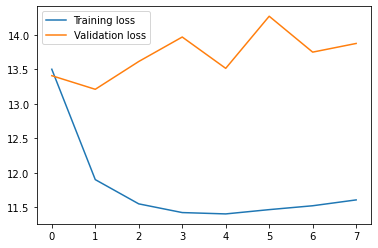

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
print(datatest.shape)

(26845, 26)


In [ ]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 30  # Number of past days we want to use to predict the future.

for i in range(n_past, len(datatest) - n_future +1):
    testX.append(datatest[i - n_past:i, 0:25])
    testY.append(datatest[i + n_future - 1:i + n_future, 25])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (26815, 30, 25).
testY shape == (26815, 1).


In [ ]:
y_generated = model.predict(testX)



In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(testY,y_generated)
mse = mean_squared_error(testY,y_generated)
rmse = math.sqrt(mean_squared_error(testY,y_generated))
print('Test MAE' ,mae)
print('Test RMSE' ,rmse)
print('Test MSE' ,mse)

Test MAE 2.801474053313344
Test RMSE 3.59489456154706
Test MSE 12.923266908640628


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(testY_noembed, y_generated_noembed)
print('Test MAE' ,mae)

In [ ]:
y_true =testY.flatten().copy()
y_pred =y_generated.flatten().copy()

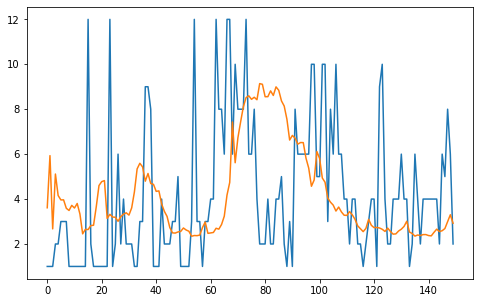

In [ ]:
plt.figure(figsize=(8,5))
y_true=testY[:150]
y_pred=y_generated[:150]

plt.plot(np.arange(len(y_true)),y_true)
plt.plot(np.arange(len(y_pred)),y_pred)

In [ ]:
print(type(y_generated))
print(y_generated.shape)
print(type(y_generated))
print(type(y_generated))

<class 'numpy.ndarray'>
(26785, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
df_train_root

,index,Date,Description,Country,UnitPrice,Quantity,Embedding
0,0,1,WHITE HANGING HEART T-LIGHT HOLDER,0.973684,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,1,1,WHITE METAL LANTERN,0.973684,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,2,1,CREAM CUPID HEARTS COAT HANGER,0.973684,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,3,1,KNITTED UNION FLAG HOT WATER BOTTLE,0.973684,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,4,1,RED WOOLLY HOTTIE WHITE HEART.,0.973684,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...,...
382754,540449,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
382755,540450,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
382756,540451,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
382757,540452,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
df_recom = df_train_root.copy()
df_recom

,index,Date,Description,Country,UnitPrice,Quantity,Embedding
0,0,1,WHITE HANGING HEART T-LIGHT HOLDER,0.973684,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,1,1,WHITE METAL LANTERN,0.973684,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,2,1,CREAM CUPID HEARTS COAT HANGER,0.973684,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,3,1,KNITTED UNION FLAG HOT WATER BOTTLE,0.973684,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,4,1,RED WOOLLY HOTTIE WHITE HEART.,0.973684,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...,...
382754,540449,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
382755,540450,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
382756,540451,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
382757,540452,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
dataframe_test = df_recom.iloc[350000:,:].copy()
dataframe_test

,index,Date,Description,Country,UnitPrice,Quantity,Embedding
350000,496026,361,SET 6 FOOTBALL CELEBRATION CANDLES,0.973684,1.25,1,"[0.16868868, 0.25400206, 0.05456858, -0.175973..."
350001,496027,361,TRAVEL SEWING KIT,0.973684,1.65,1,"[0.2508997, -0.6747382, 1.1421038, 0.19310454,..."
350002,496028,361,PLASTERS IN TIN STRONGMAN,0.973684,1.65,3,"[0.42651594, 0.9779631, 0.36864132, 0.05951358..."
350003,496029,361,PLASTERS IN TIN WOODLAND ANIMALS,0.973684,1.65,2,"[0.07745305, 0.8871304, 0.059406664, 0.2114740..."
350004,496030,361,BALLOON PUMP WITH 10 BALLOONS,0.973684,1.95,2,"[-0.098035045, 0.4561231, -0.33890328, 0.23523..."
...,...,...,...,...,...,...,...
382754,540449,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
382755,540450,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
382756,540451,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
382757,540452,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
dataframe_test=dataframe_test.iloc[:,1:]
dataframe_test=dataframe_test.reset_index(drop=True)
dataframe_test

,Date,Description,Country,UnitPrice,Quantity,Embedding
0,361,SET 6 FOOTBALL CELEBRATION CANDLES,0.973684,1.25,1,"[0.16868868, 0.25400206, 0.05456858, -0.175973..."
1,361,TRAVEL SEWING KIT,0.973684,1.65,1,"[0.2508997, -0.6747382, 1.1421038, 0.19310454,..."
2,361,PLASTERS IN TIN STRONGMAN,0.973684,1.65,3,"[0.42651594, 0.9779631, 0.36864132, 0.05951358..."
3,361,PLASTERS IN TIN WOODLAND ANIMALS,0.973684,1.65,2,"[0.07745305, 0.8871304, 0.059406664, 0.2114740..."
4,361,BALLOON PUMP WITH 10 BALLOONS,0.973684,1.95,2,"[-0.098035045, 0.4561231, -0.33890328, 0.23523..."
...,...,...,...,...,...,...
32754,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
32755,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
32756,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
32757,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
df_anomaly = df_recom.copy()
map_df= df_anomaly.groupby('Description').mean()['Quantity']
df_anomaly = df_anomaly.iloc[:,1:]
df_anomaly

,Date,Description,Country,UnitPrice,Quantity,Embedding
0,1,WHITE HANGING HEART T-LIGHT HOLDER,0.973684,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199..."
1,1,WHITE METAL LANTERN,0.973684,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866..."
2,1,CREAM CUPID HEARTS COAT HANGER,0.973684,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156..."
3,1,KNITTED UNION FLAG HOT WATER BOTTLE,0.973684,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394..."
4,1,RED WOOLLY HOTTIE WHITE HEART.,0.973684,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206..."
...,...,...,...,...,...,...
382754,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400..."
382755,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900..."
382756,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262..."
382757,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983..."


In [ ]:
df_anomaly

,Date,Description,Country,UnitPrice,Quantity,Embedding,pca
0,1,WHITE HANGING HEART T-LIGHT HOLDER,0.973684,2.55,6,"[0.7221717, 0.09276821, -1.0752072, 0.16826199...","[-4.3872743, -5.0505934, 0.24672316, 1.9381044..."
1,1,WHITE METAL LANTERN,0.973684,3.39,6,"[0.4883663, 0.03654244, -0.91464484, 0.3026866...","[-2.6784077, -7.78578, -0.8115885, 1.6334679, ..."
2,1,CREAM CUPID HEARTS COAT HANGER,0.973684,2.75,8,"[-0.6585858, 0.48429978, -0.501828, 0.37027156...","[-5.4754667, -2.7223606, 0.072615705, 1.413171..."
3,1,KNITTED UNION FLAG HOT WATER BOTTLE,0.973684,3.39,6,"[0.79409075, 0.45617697, 0.030550195, 0.317394...","[1.1802868, -2.3253531, -2.3535063, 2.3921654,..."
4,1,RED WOOLLY HOTTIE WHITE HEART.,0.973684,3.39,6,"[-0.49505576, 0.48323965, -1.1388549, -0.24206...","[-6.739228, -1.6841711, -5.2403693, -3.701272,..."
...,...,...,...,...,...,...,...
382754,376,PACK OF 20 SPACEBOY NAPKINS,0.368421,0.85,12,"[-0.53652227, 0.6246841, -0.9712642, 0.1936400...","[3.478635, 5.1078863, -5.7265882, -1.278644, -..."
382755,376,CHILDREN'S APRON DOLLY GIRL,0.368421,2.10,6,"[-0.25743884, -0.44650587, 0.4890377, -0.20900...","[-0.039948583, 2.4485295, 3.2169373, -0.041181..."
382756,376,CHILDRENS CUTLERY DOLLY GIRL,0.368421,4.15,4,"[-0.13541184, -0.15793799, 1.001712, 0.0589262...","[1.9241303, 4.14441, 2.2167304, 1.7176007, 1.9..."
382757,376,CHILDRENS CUTLERY CIRCUS PARADE,0.368421,4.15,4,"[0.07634872, 0.28934833, 2.0305305, 0.10457983...","[3.729644, 7.86559, 3.9837806, -1.2255627, -0...."


In [ ]:
def cosine(u, v):
  return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:

for i in range(0,len(dataframe_test['Description'])):
  descrip=dataframe_test['Description'][i]
  for x,y in map_df.items():
    if x==descrip:
      avg_qnt=y
      break
  if (y_generated[i] > 1.1* avg_qnt or  y_generated[i] < 0.9 * avg_qnt):
    embedd=df_anomaly[df_anomaly['Description']==descrip]['Embedding']
    embedd_index=embedd.index[0]
    embedd=df_anomaly[df_anomaly['Description']==descrip]['Embedding'][embedd_index]
    coslist=[]
    for a in df_anomaly['Embedding']:
      result = cosine(a, embedd)
      if result ==1.0:
        coslist.append(-1)
      else:
        coslist.append(result)
    coslist=np.array(coslist)
    sort_index=np.argsort(coslist)[::-1][:100]
    print(descrip)
    print("Start")
    c=0
    for ind in sort_index:
      if(c<=1):
        if df_anomaly.loc[ind]['Description']!=descrip:
          c=c+1
          print(df_anomaly.loc[ind]['Description'])
      else:
        break
    print("End")
    

  



    










  


TRAVEL SEWING KIT
Start
JUMBO BAG ALPHABET
TEA BAG PLATE RED RETROSPOT
End
PLASTERS IN TIN STRONGMAN
Start
 50'S CHRISTMAS GIFT BAG LARGE
LUNCH BAG WOODLAND
End
PLASTERS IN TIN WOODLAND ANIMALS
Start
JUMBO BAG WOODLAND ANIMALS
JUMBO BAG WOODLAND ANIMALS
End
BALLOON PUMP WITH 10 BALLOONS
Start
MEASURING TAPE BABUSHKA PINK
TRAVEL CARD WALLET SKULLS
End
CHILDREN'S SPACEBOY MUG
Start
SET 3 RETROSPOT TEA,COFFEE,SUGAR
CARAVAN SQUARE TISSUE BOX
End
SET OF 36 DOLLY GIRL PAPER DOILIES
Start
36 DOILIES DOLLY GIRL
36 DOILIES DOLLY GIRL
End
SET OF 36 TEATIME PAPER DOILIES
Start
JUMBO BAG PINK POLKADOT
TRIPLE HOOK ANTIQUE IVORY ROSE
End
SET OF 36 MUSHROOM PAPER DOILIES
Start
FRYING PAN UNION FLAG
SET OF 36 TEATIME PAPER DOILIES
End
VINTAGE UNION JACK CUSHION COVER
Start
LARGE CERAMIC TOP STORAGE JAR
VINTAGE UNION JACK DOORSTOP
End
GARLAND, VINTAGE BELLS
Start
VINTAGE BELLS GARLAND
VINTAGE BELLS GARLAND
End
SET OF 2 CERAMIC PAINTED HEARTS 
Start
RED PEONY TABLE CLOCK
CHRISTMAS CRAFT LITTLE FRIENDS
E

KeyboardInterrupt: ignored

In [ ]:
df_train_noembed = df_train.copy()
df_train_noembed

,Date,StockCode,Description,Country,UnitPrice,Quantity
0,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,6
1,1,71053,WHITE METAL LANTERN,United Kingdom,3.39,6
2,1,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,8
3,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,6
4,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,6
...,...,...,...,...,...,...
540449,9,22613,PACK OF 20 SPACEBOY NAPKINS,France,0.85,12
540450,9,22899,CHILDREN'S APRON DOLLY GIRL,France,2.10,6
540451,9,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4.15,4
540452,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,4.15,4


In [ ]:
df_train_noembed=df_train_noembed[df_train_noembed['Quantity'] <13].copy()
df_train_noembed=df_train_noembed[df_train_noembed['UnitPrice'] <5].copy()
df_train_noembed.shape

(384199, 6)

In [ ]:
df_train_noembed['StockCode'] = df_train_noembed['StockCode'].astype(str)

In [ ]:
df_train_noembed = df_train_noembed[df_train_noembed["Quantity"]!=0]

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
 #initializing an object of class LabelEncoder

df_train_noembed['StockCode'] = labelencoder.fit_transform(df_train_noembed['StockCode'])
df_train_noembed['Country'] = labelencoder.fit_transform(df_train_noembed['Country'])
df_train_noembed['Description'] = labelencoder.fit_transform(df_train_noembed['Description'])

df_train_noembed['StockCode']=df_train_noembed['StockCode'] +1
df_train_noembed['StockCode']=df_train_noembed['StockCode']/max(df_train_noembed['StockCode']) 

df_train_noembed['Country']=df_train_noembed['Country'] +1
df_train_noembed['Country']=df_train_noembed['Country']/max(df_train_noembed['Country']) 

df_train_noembed['Description']=df_train_noembed['Description'] +1
df_train_noembed['Description']=df_train_noembed['Description']/max(df_train_noembed['Description']) 

df_train_noembed['UnitPrice']=df_train_noembed['UnitPrice'] +1
df_train_noembed['UnitPrice']=df_train_noembed['UnitPrice']/max(df_train_noembed['UnitPrice'])

df_train_noembed['Date']=df_train_noembed['Date']



In [ ]:
df_train_noembed = df_train_noembed[['Date','StockCode','Description','Country','UnitPrice','Quantity']]
df_train_noembed

,Date,StockCode,Description,Country,UnitPrice,Quantity
0,2,0.888955,0.957188,0.973684,0.796327,6
1,2,0.716716,0.959213,0.973684,0.866444,6
2,2,0.777015,0.221290,0.973684,0.813022,8
3,2,0.762388,0.465722,0.973684,0.866444,6
4,2,0.762090,0.710732,0.973684,0.866444,6
...,...,...,...,...,...,...
540449,10,0.404179,0.580561,0.368421,0.654424,12
540450,10,0.470746,0.178478,0.368421,0.758765,6
540451,10,0.555522,0.180214,0.368421,0.929883,4
540452,10,0.555821,0.179925,0.368421,0.929883,4


In [ ]:
datatrain_noembedding = df_train_noembed.iloc[0:350000,:]
datatest_noembedding = df_train_noembed.iloc[350000:,:]
print(datatrain_noembedding.shape)
print(datatest_noembedding.shape)

(350000, 6)
(26845, 6)


In [ ]:
trainX_noembed = []
trainY_noembed = []

future = 1   # Number of days we want to look into the future based on the past days.
past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(past, len(datatrain_noembedding) - future +1):
    trainX_noembed.append(datatrain_noembedding.iloc[i - past:i, 0:5])
    trainY_noembed.append(datatrain_noembedding.iloc[i + future - 1:i + future, 5])

trainX_noembed, trainY_noembed = np.array(trainX_noembed), np.array(trainY_noembed)

print('trainX_noembed shape == {}.'.format(trainX_noembed.shape))
print('trainY_noembed shape == {}.'.format(trainY_noembed.shape))

trainX_noembed shape == (349970, 30, 5).
trainY_noembed shape == (349970, 1).


In [ ]:
model_noembed = Sequential()
model_noembed.add(LSTM(50, input_shape=(trainX_noembed.shape[1], trainX_noembed.shape[2]), return_sequences=True))
model_noembed.add(Dropout(0.3))
model_noembed.add(LSTM(50, return_sequences=False))
model_noembed.add(Dropout(0.3))
model_noembed.add(Dense(units=1, activation='relu'))

model_noembed.add(Activation("relu"))


optimiser = Adam(lr=0.01)
model_noembed.compile(loss="mse", optimizer=optimiser)

model_noembed.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30, 50)            11200     
                                                                 
 dropout_34 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_35 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
 activation_17 (Activation)  (None, 1)                 0         
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-tra

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_noembed = model_noembed.fit(trainX_noembed, trainY_noembed, epochs=10, batch_size=1024, validation_split=0.2, verbose=1)

Epoch 1/10
274/274 [==============================] - 79s 274ms/step - loss: 16.8945 - val_loss: 15.1872
Epoch 2/10
274/274 [==============================] - 74s 269ms/step - loss: 16.5458 - val_loss: 15.1006
Epoch 3/10
274/274 [==============================] - 75s 273ms/step - loss: 16.5337 - val_loss: 15.3363
Epoch 4/10
274/274 [==============================] - 74s 271ms/step - loss: 16.5263 - val_loss: 15.1393
Epoch 5/10
274/274 [==============================] - 74s 270ms/step - loss: 16.2726 - val_loss: 15.2440
Epoch 6/10
274/274 [==============================] - 75s 273ms/step - loss: 16.4472 - val_loss: 15.1954
Epoch 7/10
274/274 [==============================] - 75s 272ms/step - loss: 16.2002 - val_loss: 15.3219
Epoch 8/10
274/274 [==============================] - 74s 271ms/step - loss: 16.4748 - val_loss: 15.1812
Epoch 9/10
274/274 [==============================] - 74s 270ms/step - loss: 16.4343 - val_loss: 15.0724
Epoch 10/10
251/274 [==========================>...] - 

KeyboardInterrupt: ignored

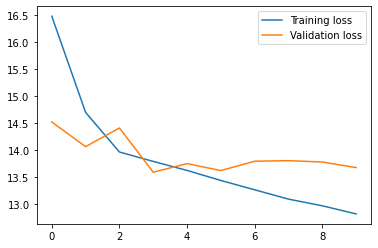

In [ ]:
plt.plot(history_noembed.history['loss'], label='Training loss')
plt.plot(history_noembed.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
testX_noembed = []
testY_noembed = []

future = 1   # Number of days we want to look into the future based on the past days.
past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(past, len(datatest_noembedding) - future +1):
    testX_noembed.append(datatest_noembedding.iloc[i - past:i, 0:5])
    testY_noembed.append(datatest_noembedding.iloc[i + future - 1:i + future, 5])

testX_noembed, testY_noembed = np.array(testX_noembed), np.array(testY_noembed)

print('testX_noembed shape == {}.'.format(testX_noembed.shape))
print('testY_noembed shape == {}.'.format(testY_noembed.shape))

testX_noembed shape == (26815, 30, 5).
testY_noembed shape == (26815, 1).


In [ ]:
y_generated_noembed = model_noembed.predict(testX_noembed)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(testY_noembed, y_generated_noembed)
mse = mean_squared_error(testY_noembed, y_generated_noembed)
rmse = math.sqrt(mean_squared_error(testY_noembed, y_generated_noembed))
print('Test MAE' ,mae)
print('Test RMSE noembed' ,rmse)
print('Test MSE noembed' ,mse)

Test MAE 3.2204771533644556
Test RMSE noembed 3.7357506679603194
Test MSE noembed 13.955833053165971


In [ ]:
true=testY_noembed.flatten().copy()
pred_y=y_generated_noembed.flatten().copy()

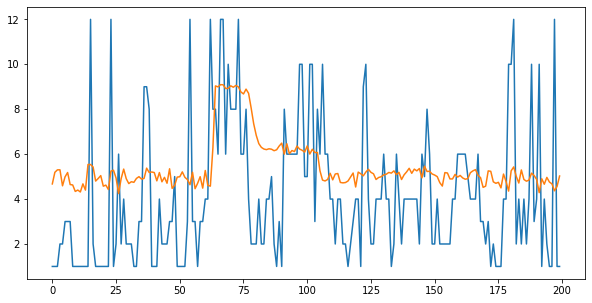

In [ ]:
plt.figure(figsize = (10,5))
true=testY_noembed[:200]
pred_y=y_generated_noembed[:200]

plt.plot(np.arange(len(true)),true)
plt.plot(np.arange(len(pred_y)),pred_y)

In [ ]:
model_GRU = Sequential()
model_GRU.add(GRU(50, input_shape=(trainX_noembed.shape[1], trainX_noembed.shape[2]), return_sequences=True))
model_GRU.add(Dropout(0.3))
model_GRU.add(GRU(50, return_sequences=False))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(units=1, activation='relu'))

model_GRU.add(Activation("relu"))


optimiser = Adam(lr=0.01)
model_GRU.compile(loss="mse", optimizer=optimiser,)

model_GRU.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 50)            8550      
                                                                 
 dropout_32 (Dropout)        (None, 30, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_33 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
 activation_16 (Activation)  (None, 1)                 0         
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-tra

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_GRU = model_GRU.fit(trainX_noembed, trainY_noembed, epochs=8, batch_size=1024, validation_split=0.2, verbose=1)

Epoch 1/8
274/274 [==============================] - 68s 235ms/step - loss: 16.4706 - val_loss: 14.4443
Epoch 2/8
274/274 [==============================] - 64s 235ms/step - loss: 16.2063 - val_loss: 14.9207
Epoch 3/8
274/274 [==============================] - 64s 234ms/step - loss: 15.5617 - val_loss: 14.4609
Epoch 4/8
274/274 [==============================] - 64s 234ms/step - loss: 15.4609 - val_loss: 14.4747
Epoch 5/8
274/274 [==============================] - 64s 234ms/step - loss: 14.9913 - val_loss: 13.9793
Epoch 6/8
274/274 [==============================] - 64s 235ms/step - loss: 14.0723 - val_loss: 13.8159
Epoch 7/8
274/274 [==============================] - 65s 236ms/step - loss: 13.8352 - val_loss: 14.2812
Epoch 8/8
274/274 [==============================] - 64s 235ms/step - loss: 13.7361 - val_loss: 14.0245


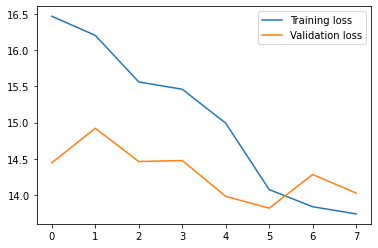

In [ ]:
plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
testX_noembed = []
testY_noembed = []

future = 1   # Number of days we want to look into the future based on the past days.
past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(past, len(datatest_noembedding) - future +1):
    testX_noembed.append(datatest_noembedding.iloc[i - past:i, 0:5])
    testY_noembed.append(datatest_noembedding.iloc[i + future - 1:i + future, 5])

testX_noembed, testY_noembed = np.array(testX_noembed), np.array(testY_noembed)

print('testX_noembed shape == {}.'.format(testX_noembed.shape))
print('testY_noembed shape == {}.'.format(testY_noembed.shape))

testX_noembed shape == (26815, 30, 5).
testY_noembed shape == (26815, 1).


In [ ]:
y_generated_GRU = model_GRU.predict(testX_noembed)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(testY_noembed, y_generated_GRU)
rmse = math.sqrt(mean_squared_error(testY_noembed, y_generated_GRU))
mae = mean_absolute_error(testY_noembed, y_generated_GRU)
print('Test MAE' ,mae)
print('Test MSE GRU' ,mse)
print('Test RMSE GRU' ,rmse)

Test MAE 2.9662672267617207
Test MSE GRU 13.037238017162135
Test RMSE GRU 3.610711566597661


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(testY_noembed, y_generated_noembed)
print('Test MAE' ,mae)

Test MAE 3.2622285453316096


In [ ]:
true=testY_noembed.flatten().copy()
pred_y=y_generated_noembed.flatten().copy()

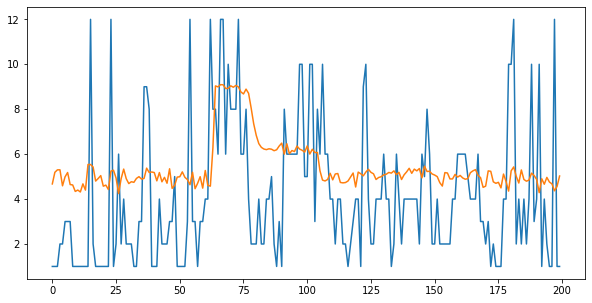

In [ ]:
plt.figure(figsize = (10,5))
true=testY_noembed[:200]
pred_y=y_generated_noembed[:200]

plt.plot(np.arange(len(true)),true)
plt.plot(np.arange(len(pred_y)),pred_y)